In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

In [3]:
y   = load('../../March2021/Observation_models/ObsY.joblib') 
CNN = load('../../March2021/Observation_models/CNNY.joblib') 
LR  = load('../../March2021/Observation_models/LRY.joblib')
SVR  = load('../../March2021/Observation_models/SVRY.joblib')

ACCESS_CM2_CNN = load('ACCESS-CM2-CNN-Y1.joblib')
ACCESS_CM2_LR = load('ACCESS-CM2-LR-Y.joblib')
ACCESS_CM2_SVR = load('ACCESS-CM2-SVR-Y.joblib')

CanESM5_CNN = load('CanESM5-CNN-Y.joblib')
CanESM5_LR = load('CanESM5-LR-Y.joblib')
CanESM5_SVR = load('CanESM5-SVR-Y.joblib')

IITMESM_CNN = load('IITM-ESM-CNN-Y1.joblib')
IITMESM_LR = load('IITM-ESM-LR-Y.joblib')
IITMESM_SVR = load('IITM-ESM-SVR-Y.joblib')

INM_CM4_8_CNN = load('INM-CM4-8-CNN-Y.joblib')
INM_CM4_8_LR = load('INM-CM4-8-LR-Y.joblib')
INM_CM4_8_SVR = load('INM-CM4-8-SVR-Y.joblib')

INM_CM5_0_CNN = load('INM-CM5-0-CNN-Y.joblib')
INM_CM5_0_LR = load('INM-CM5-0-LR-Y.joblib')
INM_CM5_0_SVR = load('INM-CM5-0-SVR-Y.joblib')

IPSL_CM6A_LR_CNN = load('IPSL-CM6A-LR-CNN-Y1.joblib')
IPSL_CM6A_LR_LR = load('IPSL-CM6A-LR-LR-Y.joblib')
IPSL_CM6A_LR_SVR = load('IPSL-CM6A-LR-SVR-Y.joblib')

MIROC6_CNN = load('MIROC6-CNN-Y.joblib')
MIROC6_LR = load('MIROC6-LR-Y.joblib')
MIROC6_SVR = load('MIROC6-SVR-Y.joblib')

MRI_ESM2_0_CNN = load('MRI-ESM2-0-CNN-Y.joblib')
MRI_ESM2_0_LR = load('MRI-ESM2-0-LR-Y.joblib')
MRI_ESM2_0_SVR = load('MRI-ESM2-0-SVR-Y.joblib')

MPI_ESM1_2_LR_CNN = load('MPI-ESM1-2-LR-CNN-Y1.joblib')
MPI_ESM1_2_LR_LR = load('MPI-ESM1-2-LR-LR-Y.joblib')
MPI_ESM1_2_LR_SVR = load('MPI-ESM1-2-LR-SVR-Y.joblib')

MPI_ESM1_2_HR_CNN = load('MPI-ESM1-2-HR-CNN-Y.joblib')
MPI_ESM1_2_HR_LR = load('MPI-ESM1-2-HR-LR-Y.joblib')
MPI_ESM1_2_HR_SVR = load('MPI-ESM1-2-HR-SVR-Y.joblib')

EC_Earth3_CNN = load('EC-Earth3-CNN-Y1.joblib')
EC_Earth3_LR = load('EC-Earth3-LR-Y.joblib')
EC_Earth3_SVR = load('EC-Earth3-SVR-Y.joblib')


In [4]:
EC_Earth3_SVR
MIROC6_SVR

<xarray.DataArray 'yLR' (time: 2170)>
array([-0.28488582, -0.55015635, -0.5512383 , ..., -0.34962042,
       -0.318164  , -0.26831738])
Coordinates:
    height   float64 ...
  * time     (time) datetime64[ns] 1980-01-01T12:00:00 ... 2014-12-31T12:00:00

In [5]:
def getFogTS( dArray ):
   #"This function gives TS of  for each season e.g. if year
   #  is 1981 then it will contain values between 1dec1980 to 31jan1981"
    fg=list()
    
    for yr in range(1981,2015,1):
        dStart=datetime.datetime(yr-1, 12, 1)
        dEnd=datetime.datetime(yr, 1, 31)
        ySMean = dArray.sel(time=slice(dStart,dEnd)).mean(dim='time').values.tolist()
        #print(yAct)
        fg.append(ySMean)
        
    
    return fg

In [6]:
fO=getFogTS(y)
ObsMean=st.mean(fO)
print(ObsMean)
ObsStd=st.stdev(fO)
print(ObsStd)

0.2832827324478178
0.11073566489111651


In [7]:
pow(4, 2)

16

In [8]:
RE=list()
IVS=list()
fList=(y,LR,SVR,CNN,ACCESS_CM2_CNN,CanESM5_CNN,IITMESM_CNN,INM_CM4_8_CNN,INM_CM5_0_CNN ,IPSL_CM6A_LR_CNN,MIROC6_CNN,MRI_ESM2_0_CNN, MPI_ESM1_2_LR_CNN, MPI_ESM1_2_HR_CNN,EC_Earth3_CNN)
for fL in fList :
    ts=getFogTS(fL)
    re1=((st.mean(ts)-ObsMean)/ObsMean)*100.0
    RE.append(re1)
    stdCal=((st.stdev(ts)/ObsStd)-(ObsStd/st.stdev(ts)))
    ivs1=pow(stdCal,2)
    IVS.append(ivs1)
    
print(RE)    
print(IVS)
    


[0.0, 2.899718268806138, -1.4525278365297047, 1.5104495761974048, 2.0482425249240257, -3.2809725021899134, -3.1962824826806133, -3.801534517274971, -3.67619929737507, 1.1100139722684201, 0.89136421544705, -0.30901417584353763, -0.5414211410265126, 1.9943645863405672, 0.7843299875728]
[0.0, 0.634131379049697, 0.68288298827451, 0.0002646566658969368, 0.42638071489767215, 0.5858882491530298, 1.1122758073220114, 1.5703174991636382, 3.5055875901808875, 0.4092651313656827, 1.23428575155686, 1.6151085843437882, 0.34163123014274804, 0.7385936336130301, 0.0027097060227614022]


In [9]:
RE=list()
IVS=list()
fList=(y,LR,SVR,CNN,ACCESS_CM2_CNN,CanESM5_CNN,IITMESM_CNN,INM_CM4_8_CNN,INM_CM5_0_CNN ,IPSL_CM6A_LR_CNN,MIROC6_CNN,MRI_ESM2_0_CNN, MPI_ESM1_2_LR_CNN, MPI_ESM1_2_HR_CNN,EC_Earth3_CNN)
for fL in fList :
    ts=getFogTS(fL)
    re1=((st.mean(ts)-ObsMean)/ObsMean)*100.0
    RE.append(re1)
    stdCal=((st.stdev(ts)/ObsStd)-(ObsStd/st.stdev(ts)))
    ivs1=pow(stdCal,2)
    IVS.append(ivs1)
    
print(RE)    
print(IVS)

[0.0, 2.899718268806138, -1.4525278365297047, 1.5104495761974048, 2.0482425249240257, -3.2809725021899134, -3.1962824826806133, -3.801534517274971, -3.67619929737507, 1.1100139722684201, 0.89136421544705, -0.30901417584353763, -0.5414211410265126, 1.9943645863405672, 0.7843299875728]
[0.0, 0.634131379049697, 0.68288298827451, 0.0002646566658969368, 0.42638071489767215, 0.5858882491530298, 1.1122758073220114, 1.5703174991636382, 3.5055875901808875, 0.4092651313656827, 1.23428575155686, 1.6151085843437882, 0.34163123014274804, 0.7385936336130301, 0.0027097060227614022]


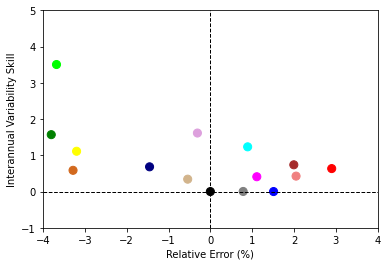

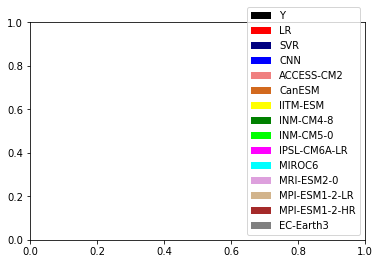

In [10]:

import matplotlib.patches as mpatches
classes = ['Y','LR','SVR','CNN','ACCESS-CM2','CanESM','IITM-ESM','INM-CM4-8','INM-CM5-0','IPSL-CM6A-LR','MIROC6','MRI-ESM2-0','MPI-ESM1-2-LR','MPI-ESM1-2-HR','EC-Earth3']
class_colours = ['black','red','navy','blue','lightcoral','chocolate','yellow','green','lime','magenta','aqua','plum','tan','brown','grey']

figure, axes = plt.subplots()
plt.scatter(RE, IVS, c=class_colours, s=65)
plt.ylim(top=5) #ymax is your value
plt.ylim(bottom=-1) #ymin is your value
plt.xlim(right=4) #xmax is your value
plt.xlim(left=-4) #xmin is your value
plt.xlabel('Relative Error (%)')
plt.ylabel('Interannual Variability Skill')
x1, y1 = [RE[0], RE[0]], [-1, 5]
x2, y2 = [-4, 4], [IVS[0], IVS[0]]
plt.plot(x1, y1,'--',  x2, y2,'--', linewidth=1,color='black')
#c=plt.Circle(( fMean[0] ,fCV[0] ), fMean[0]*10/100.0 )
#axes.set_aspect( 1 )
#axes.add_artist( c)
plt.show()


recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=4)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


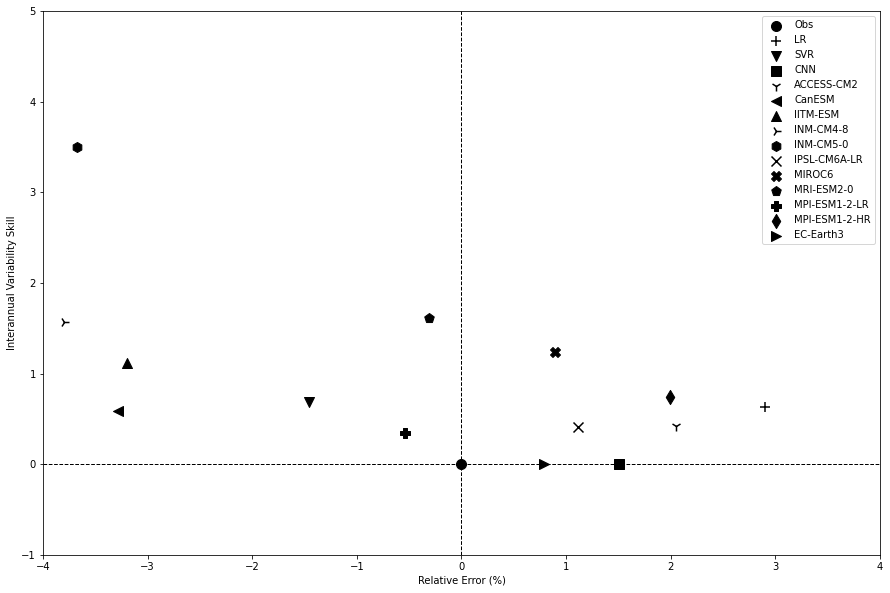

In [18]:

import matplotlib.patches as mpatches
classes = ['Obs','LR','SVR','CNN','ACCESS-CM2','CanESM','IITM-ESM','INM-CM4-8','INM-CM5-0','IPSL-CM6A-LR',
           'MIROC6','MRI-ESM2-0','MPI-ESM1-2-LR','MPI-ESM1-2-HR','EC-Earth3']
#class_colours = ['black','red','navy','blue','lightcoral','chocolate','yellow','green','lime','magenta','aqua','plum','tan','brown','grey']
class_colours = ['black','black','black','black','black','black','black',
                 'black','black','black','black','black','black','black','black']
markers=['o','+','v','s','1','<','^','4','h','x','X','p','P','d','>']

figure, axes = plt.subplots(figsize=(15,10))


for r,i,m,c in zip(RE,IVS,markers,classes):
    plt.scatter(r, i, c='black', marker=m, label=c,s=100)
plt.ylim(top=5) #ymax is your value
plt.ylim(bottom=-1) #ymin is your value
plt.xlim(right=4) #xmax is your value
plt.xlim(left=-4) #xmin is your value
plt.xlabel('Relative Error (%)')
plt.ylabel('Interannual Variability Skill')
plt.legend()
x1, y1 = [RE[0], RE[0]], [-1, 5]
x2, y2 = [-4, 4], [IVS[0], IVS[0]]
plt.plot(x1, y1,'--',  x2, y2,'--', linewidth=1,color='black',fillstyle='none')
#c=plt.Circle(( fMean[0] ,fCV[0] ), fMean[0]*10/100.0 )
#axes.set_aspect( 1 )
#axes.add_artist( c)
plt.legend()


plt.savefig('FogFraction_RE_IVS.eps')
plt.show()

#recs = []
#for i in range(0,len(class_colours)):
#    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
#plt.legend(recs,classes,loc=4)

In [11]:
RE=list()
IVS=list()
fList=(y,ACCESS_CM2_CNN,CanESM5_CNN,IITMESM_CNN,INM_CM4_8_CNN,INM_CM5_0_CNN ,IPSL_CM6A_LR_CNN,MIROC6_CNN,MRI_ESM2_0_CNN, MPI_ESM1_2_LR_CNN, MPI_ESM1_2_HR_CNN,EC_Earth3_CNN)
for fL in fList :
    ts=getFogTS(fL)
    re1=((st.mean(ts)-ObsMean)/ObsMean)*100.0
    RE.append(re1)
    stdCal=((st.stdev(ts)/ObsStd)-(ObsStd/st.stdev(ts)))
    ivs1=pow(stdCal,2)
    IVS.append(ivs1)
    
print(RE)    
print(IVS)
    


[0.0, 2.0482425249240257, -3.2809725021899134, -3.1962824826806133, -3.801534517274971, -3.67619929737507, 1.1100139722684201, 0.89136421544705, -0.30901417584353763, -0.5414211410265126, 1.9943645863405672, 0.7843299875728]
[0.0, 0.42638071489767215, 0.5858882491530298, 1.1122758073220114, 1.5703174991636382, 3.5055875901808875, 0.4092651313656827, 1.23428575155686, 1.6151085843437882, 0.34163123014274804, 0.7385936336130301, 0.0027097060227614022]


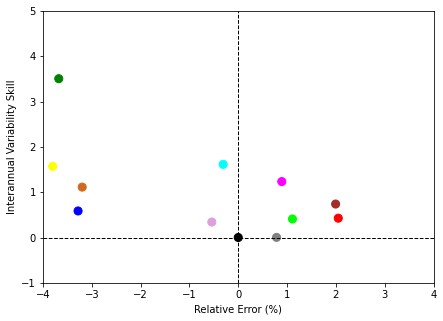

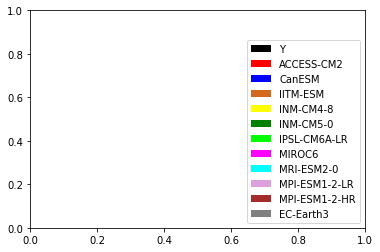

In [12]:

import matplotlib.patches as mpatches
classes = ['Y','ACCESS-CM2','CanESM','IITM-ESM','INM-CM4-8','INM-CM5-0','IPSL-CM6A-LR','MIROC6','MRI-ESM2-0','MPI-ESM1-2-LR','MPI-ESM1-2-HR','EC-Earth3']
class_colours = ['black','red','blue','chocolate','yellow','green','lime','magenta','aqua','plum','brown','grey']

fig = plt.figure(figsize=(7,5))
plt.scatter(RE, IVS, c=class_colours, s=65)
plt.ylim(top=5) #ymax is your value
plt.ylim(bottom=-1) #ymin is your value
plt.xlim(right=4) #xmax is your value
plt.xlim(left=-4) #xmin is your value
plt.xlabel('Relative Error (%)')
plt.ylabel('Interannual Variability Skill')
x1, y1 = [RE[0], RE[0]], [-1, 5]
x2, y2 = [-4, 4], [IVS[0], IVS[0]]
plt.plot(x1, y1,'--',  x2, y2,'--', linewidth=1,color='black')
#c=plt.Circle(( fMean[0] ,fCV[0] ), fMean[0]*10/100.0 )
#axes.set_aspect( 1 )
#axes.add_artist( c)
plt.savefig('FogFraction_RE_IVS.png')
plt.show()


recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=4)
plt.savefig('FogFraction_RE_IVS_legend.png')

[0.0, -259.408571528145, -1209.5710820630666, -557.2436035518218, -689.7154598808701, -462.31601693080995, -1267.9302817966984, -196.91745392338518, -895.937825037389, -491.3529235831609, -224.13790283006335, -865.3039699555159]
[0.0, 5.312002315081889, 7.216794671212778, 4.155484887000405, 26.64973689731897, 29.1362216851692, 8.128652626564286, 2.313117805901321, 3.4726119689749244, 2.678544985218266, 2.1482864700478195, 2.4173016588878706]


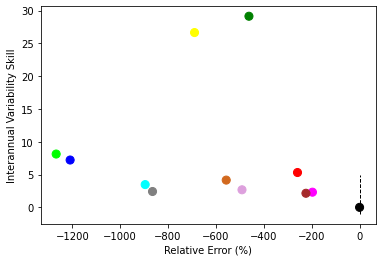

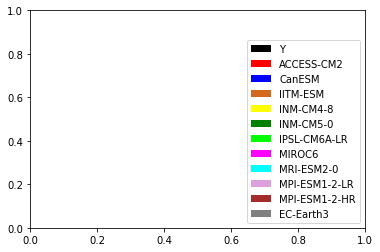

In [13]:
RE=list()
IVS=list()
fList=(y,ACCESS_CM2_LR,CanESM5_LR,IITMESM_LR,INM_CM4_8_LR,INM_CM5_0_LR ,IPSL_CM6A_LR_LR,MIROC6_LR,MRI_ESM2_0_LR, MPI_ESM1_2_LR_LR, MPI_ESM1_2_HR_LR,EC_Earth3_LR)
for fL in fList :
    ts=getFogTS(fL)
    re1=((st.mean(ts)-ObsMean)/ObsMean)*100.0
    RE.append(re1)
    stdCal=((st.stdev(ts)/ObsStd)-(ObsStd/st.stdev(ts)))
    ivs1=pow(stdCal,2)
    IVS.append(ivs1)
    
print(RE)    
print(IVS)


import matplotlib.patches as mpatches
classes = ['Y','ACCESS-CM2','CanESM','IITM-ESM','INM-CM4-8','INM-CM5-0','IPSL-CM6A-LR','MIROC6','MRI-ESM2-0','MPI-ESM1-2-LR','MPI-ESM1-2-HR','EC-Earth3']
class_colours = ['black','red','blue','chocolate','yellow','green','lime','magenta','aqua','plum','brown','grey']

figure, axes = plt.subplots()
plt.scatter(RE, IVS, c=class_colours, s=65)
#plt.ylim(top=5) #ymax is your value
#plt.ylim(bottom=-1) #ymin is your value
#plt.xlim(right=4) #xmax is your value
#plt.xlim(left=-4) #xmin is your value
plt.xlabel('Relative Error (%)')
plt.ylabel('Interannual Variability Skill')
x1, y1 = [RE[0], RE[0]], [-1, 5]
x2, y2 = [-4, 4], [IVS[0], IVS[0]]
plt.plot(x1, y1,'--',  x2, y2,'--', linewidth=1,color='black')
#c=plt.Circle(( fMean[0] ,fCV[0] ), fMean[0]*10/100.0 )
#axes.set_aspect( 1 )
#axes.add_artist( c)
plt.show()


recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=4)


[0.0, -271.54592554519155, -1124.4658059057092, -573.4034846565338, -694.2496168387277, -475.81166143226375, -1158.2109599240762, -229.66621122082037, -877.4697828859963, -506.5915470406762, -232.33665365784682, -852.0619118498041]
[0.0, 5.756039913824451, 8.335391561627379, 5.890349813065015, 18.947218907206548, 36.443509515514286, 12.26205430584594, 2.9255240225103645, 12.061773345421056, 5.185589235825935, 2.8490482382872626, 5.983218584764867]


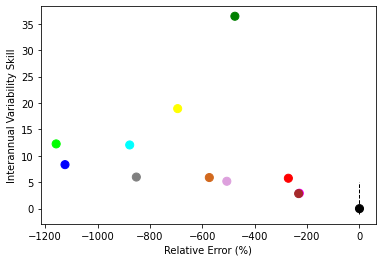

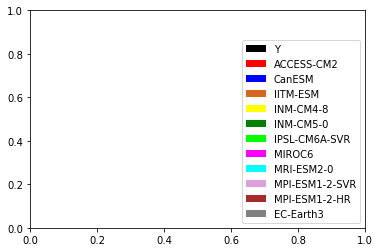

In [15]:
RE=list()
IVS=list()
fList=(y,ACCESS_CM2_SVR,CanESM5_SVR,IITMESM_SVR,INM_CM4_8_SVR,INM_CM5_0_SVR ,IPSL_CM6A_LR_SVR,MIROC6_SVR,MRI_ESM2_0_SVR, MPI_ESM1_2_LR_SVR, MPI_ESM1_2_HR_SVR,EC_Earth3_SVR)
for fL in fList :
    ts=getFogTS(fL)
    re1=((st.mean(ts)-ObsMean)/ObsMean)*100.0
    RE.append(re1)
    stdCal=((st.stdev(ts)/ObsStd)-(ObsStd/st.stdev(ts)))
    ivs1=pow(stdCal,2)
    IVS.append(ivs1)
    
print(RE)    
print(IVS)


import matplotlib.patches as mpatches
classes = ['Y','ACCESS-CM2','CanESM','IITM-ESM','INM-CM4-8','INM-CM5-0','IPSL-CM6A-SVR','MIROC6','MRI-ESM2-0','MPI-ESM1-2-SVR','MPI-ESM1-2-HR','EC-Earth3']
class_colours = ['black','red','blue','chocolate','yellow','green','lime','magenta','aqua','plum','brown','grey']

figure, axes = plt.subplots()
plt.scatter(RE, IVS, c=class_colours, s=65)
#plt.ylim(top=5) #ymax is your value
#plt.ylim(bottom=-1) #ymin is your value
#plt.xlim(right=4) #xmax is your value
#plt.xlim(left=-4) #xmin is your value
plt.xlabel('Relative Error (%)')
plt.ylabel('Interannual Variability Skill')
x1, y1 = [RE[0], RE[0]], [-1, 5]
x2, y2 = [-4, 4], [IVS[0], IVS[0]]
plt.plot(x1, y1,'--',  x2, y2,'--', linewidth=1,color='black')
#c=plt.Circle(( fMean[0] ,fCV[0] ), fMean[0]*10/100.0 )
#axes.set_aspect( 1 )
#axes.add_artist( c)
plt.show()


recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=4)
